<h1 align="center"><font color="yellow">LangChain: Memory</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

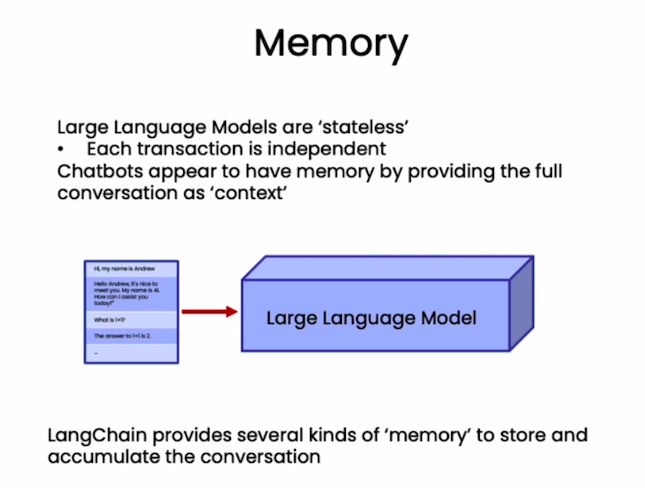

Estudaremos os seguintes pontos:

* ConversationBufferMemory

* ConversationBufferWindowMemory

* ConversationTokenBufferMemory

* ConversationSummaryMemory

# <font color="red">ConversationBufferMemory</font>

In [2]:
import openai 
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key  = os.environ['OPENAI_API_KEY']

import warnings
warnings.filterwarnings('ignore')


In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [6]:
llm = ChatOpenAI(temperature=0.0)

memory = ConversationBufferMemory()

conversation = ConversationChain(llm=llm,
                                 memory = memory,
                                 verbose=False
                                )


In [4]:
conversation.predict(input="Olá, meu nome é Andrew")

'Olá, Andrew! Como posso ajudá-lo hoje?'

In [5]:
conversation.predict(input="Quanto é 1+1?")

'1+1 é igual a 2.'

In [6]:
conversation.predict(input="Qual é meu nome?")

'Seu nome é Andrew.'

In [7]:
print(memory.buffer)

Human: Olá, meu nome é Andrew
AI: Olá, Andrew! Como posso ajudá-lo hoje?
Human: Quanto é 1+1?
AI: 1+1 é igual a 2.
Human: Qual é meu nome?
AI: Seu nome é Andrew.


In [8]:
memory.load_memory_variables({})

{'history': 'Human: Olá, meu nome é Andrew\nAI: Olá, Andrew! Como posso ajudá-lo hoje?\nHuman: Quanto é 1+1?\nAI: 1+1 é igual a 2.\nHuman: Qual é meu nome?\nAI: Seu nome é Andrew.'}

In [9]:
memory = ConversationBufferMemory()

In [10]:
memory.save_context({"input": "Olá"}, 
                    {"output": "Estás bem?"})

In [11]:
print(memory.buffer)

Human: Olá
AI: Estás bem?


In [12]:
memory.load_memory_variables({})

{'history': 'Human: Olá\nAI: Estás bem?'}

In [13]:
memory.save_context({"input": "Não muito, estou com alguns probleminhas."}, 
                    {"output": "Poxa."})

In [14]:
memory.load_memory_variables({})

{'history': 'Human: Olá\nAI: Estás bem?\nHuman: Não muito, estou com alguns probleminhas.\nAI: Poxa.'}

# <font color="red">ConversationBufferWindowMemory</font>

In [15]:
from langchain.memory import ConversationBufferWindowMemory


memory = ConversationBufferWindowMemory(k=5)   

In [16]:
memory.save_context({"input": "Olá, me chamo Eddy!"},
                    {"output": "Como vai?"})
memory.save_context({"input": "Não muito bem, estou cheio de dívidas."},
                    {"output": "Nossa."})

In [17]:
memory.load_memory_variables({})

{'history': 'Human: Olá, me chamo Eddy!\nAI: Como vai?\nHuman: Não muito bem, estou cheio de dívidas.\nAI: Nossa.'}

In [18]:
llm = ChatOpenAI(temperature=0.0)

memory = ConversationBufferWindowMemory(k=3)

conversation = ConversationChain(llm=llm,
                                 memory = memory,
                                 verbose=True
                                )


In [ ]:
conversation.predict(input="Qual é meu nome?")

In [ ]:
conversation.predict(input="Quanto é 1+1?")

In [ ]:
conversation.predict(input="Qual é meu nome?")

# <font color="red">ConversationTokenBufferMemory</font>

Precisa instalar:

```
!pip install tiktoken
```

In [17]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI


llm = ChatOpenAI(temperature=0.0, verbose=True)

In [22]:
memory = ConversationTokenBufferMemory(llm=llm,
                                       max_token_limit=30,
                                       verbose=False
                                      )


memory.save_context({"input": "IA é o quê?!"},
                    {"output": "Incrível!"})
memory.save_context({"input": "Backpropagation é o quê?"},
                    {"output": "Lindo!"})
memory.save_context({"input": "Chatbots são o quê?"}, 
                    {"output": "Encantador!"})


In [23]:
memory.load_memory_variables({})

{'history': 'Human: Chatbots são o quê?\nAI: Encantador!'}

In [84]:
conversation = ConversationChain(llm=llm,
                                 memory = memory,
                                 verbose=True
                                )

In [85]:
conversation.predict(input="Olá, meu nome é Andrew")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: IA é o quê?!
AI: Incrível!
Human: Backpropagation é o quê?
AI: Lindo!
Human: Chatbots são o quê?
AI: Encantador!
Human: Olá, meu nome é Andrew
AI:

> Finished chain.


'Olá, Andrew! Prazer em conhecê-lo. Como posso ajudar você hoje?'

In [86]:
conversation.predict(input="Quanto é 1+1?")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: IA é o quê?!
AI: Incrível!
Human: Backpropagation é o quê?
AI: Lindo!
Human: Chatbots são o quê?
AI: Encantador!
Human: Olá, meu nome é Andrew
AI: Olá, Andrew! Prazer em conhecê-lo. Como posso ajudar você hoje?
Human: Quanto é 1+1?
AI:

> Finished chain.


'1+1 é igual a 2.'

In [87]:
conversation.predict(input="Eu sou de Perú e estudo na Ufes.")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: IA é o quê?!
AI: Incrível!
Human: Backpropagation é o quê?
AI: Lindo!
Human: Chatbots são o quê?
AI: Encantador!
Human: Olá, meu nome é Andrew
AI: Olá, Andrew! Prazer em conhecê-lo. Como posso ajudar você hoje?
Human: Quanto é 1+1?
AI: 1+1 é igual a 2.
Human: Eu sou de Perú e estudo na Ufes.
AI:

> Finished chain.


'Que interessante! Peru é um país incrível e a Ufes é uma ótima universidade. Em que área você estuda?'

In [88]:
conversation.predict(input="Qual é meu nome?")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: IA é o quê?!
AI: Incrível!
Human: Backpropagation é o quê?
AI: Lindo!
Human: Chatbots são o quê?
AI: Encantador!
Human: Olá, meu nome é Andrew
AI: Olá, Andrew! Prazer em conhecê-lo. Como posso ajudar você hoje?
Human: Quanto é 1+1?
AI: 1+1 é igual a 2.
Human: Eu sou de Perú e estudo na Ufes.
AI: Que interessante! Peru é um país incrível e a Ufes é uma ótima universidade. Em que área você estuda?
Human: Qual é meu nome?
AI:

> Finished chain.


'Seu nome é Andrew.'

# <font color="red">ConversationSummaryMemory</font>

In [12]:
from langchain.memory import ConversationSummaryBufferMemory



# Criamos uma string Longa:
schedule = "Há uma reunião às 8h com sua equipe de produto. Você precisará \
de sua apresentação em powerpoint preparada. Das 9h às 12h, tenha tempo para \
trabalhar em seu projeto LangChain, que será rápido porque o Langchain é uma \
ferramenta tão poderosa. Ao meio-dia, almoce no restaurante italiano com um cliente \
que está dirigindo há mais de uma hora para conhecê-lo para entender as últimas \
novidades em IA. Certifique-se de trazer seu laptop para mostrar a última demonstração do LLM."


memory = ConversationSummaryBufferMemory(llm=llm,
                                         max_token_limit=10,
                                         verbose=True
                                        )

memory.save_context({"input": "Olá"}, {"output": "Como vai?"})
memory.save_context({"input": "Não muito bem, muitos probleminhas."},
                    {"output": "Nossa."})
memory.save_context({"input": "Qual é a programação (schedule) de hoje?"}, 
                    {"output": f"{schedule}"})


In [13]:
memory.load_memory_variables({})

{'history': 'System: The human greets the AI in Portuguese and expresses that they are not doing well and have many problems. The AI responds with "Nossa." The human then asks about the schedule for today. The AI provides a detailed schedule, including a meeting with the product team at 8am, working on the LangChain project from 9am to 12pm, and having lunch with a client at an Italian restaurant. The AI also mentions the importance of bringing a laptop to show the latest demonstration of the LLM.'}

In [14]:
conversation = ConversationChain(llm=llm,
                                 memory = memory,
                                 verbose=True
                                )


In [15]:
conversation.predict(input="Qual seria uma boa demonstração para mostrar?")



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human greets the AI in Portuguese and expresses that they are not doing well and have many problems. The AI responds with "Nossa." The human then asks about the schedule for today. The AI provides a detailed schedule, including a meeting with the product team at 8am, working on the LangChain project from 9am to 12pm, and having lunch with a client at an Italian restaurant. The AI also mentions the importance of bringing a laptop to show the latest demonstration of the LLM.
Human: Qual seria uma boa demonstração para mostrar?
AI:

> Finished chain.


'Uma boa demonstração para mostrar seria uma apresentação interativa do LLM, onde você pode destacar os recursos e funcionalidades mais impressionantes do projeto. Por exemplo, você pode demonstrar como o LLM é capaz de traduzir com precisão textos complexos em diferentes idiomas, ou como ele pode analisar grandes volumes de dados linguísticos em tempo real. Além disso, você pode mostrar como o LLM pode ser integrado a outros sistemas e plataformas, tornando-o uma solução versátil e poderosa para diversas aplicações.'

In [16]:
memory.load_memory_variables({})


{'history': 'System: The human greets the AI in Portuguese and expresses their problems. The AI responds with "Nossa." The human asks about the schedule for today. The AI provides a detailed schedule, including a meeting with the product team at 8am, working on the LangChain project from 9am to 12pm, and having lunch with a client at an Italian restaurant. The AI also mentions the importance of bringing a laptop to show the latest demonstration of the LLM. The human asks what would be a good demonstration to show. The AI suggests an interactive presentation of the LLM, highlighting its impressive features and functionalities. For example, it can demonstrate the LLM\'s ability to accurately translate complex texts in different languages or analyze large volumes of linguistic data in real-time. Additionally, it can show how the LLM can be integrated into other systems and platforms, making it a versatile and powerful solution for various applications.'}